# Importing libraries

In [71]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import json
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api

# Getting data

In [72]:
# Entering the league's  link
link = "https://understat.com/league/Serie_A/2022"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')

# Geting the data 
strings = scripts[2].string 

# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

In [73]:
# Checking what we've got

str(data)[:1000]

"{'94': {'id': '94', 'title': 'Verona', 'history': [{'h_a': 'h', 'xG': 1.13087, 'xGA': 2.79803, 'npxG': 1.13087, 'npxGA': 2.79803, 'ppda': {'att': 301, 'def': 24}, 'ppda_allowed': {'att': 136, 'def': 16}, 'deep': 3, 'deep_allowed': 17, 'scored': 2, 'missed': 5, 'xpts': 0.4179, 'result': 'l', 'date': '2022-08-15 16:30:00', 'wins': 0, 'draws': 0, 'loses': 1, 'pts': 0, 'npxGD': -1.6671599999999998}, {'h_a': 'a', 'xG': 2.46808, 'xGA': 1.13475, 'npxG': 2.46808, 'npxGA': 1.13475, 'ppda': {'att': 166, 'def': 27}, 'ppda_allowed': {'att': 139, 'def': 16}, 'deep': 4, 'deep_allowed': 4, 'scored': 1, 'missed': 1, 'xpts': 2.3346999999999998, 'result': 'd', 'date': '2022-08-21 18:45:00', 'wins': 0, 'draws': 1, 'loses': 0, 'pts': 1, 'npxGD': 1.3333300000000001}, {'h_a': 'h', 'xG': 0.369511, 'xGA': 0.843159, 'npxG': 0.369511, 'npxGA': 0.843159, 'ppda': {'att': 177, 'def': 31}, 'ppda_allowed': {'att': 176, 'def': 12}, 'deep': 4, 'deep_allowed': 7, 'scored': 0, 'missed': 1, 'xpts': 0.8359, 'result': 'l'

# Extracting xG and Goals

In [74]:
# Extracting xG and Goals from every game

teams_xg = []
teams_g = []
teams_ha = []

for i in data:

    for team in data[i]['history']:
        teams_xg.append(team['xG'])
        teams_g.append(team['scored'])
        teams_ha.append(team['h_a'])

In [75]:
# Checking their lenght
# There were 20 teams with 38 matches each, resulting in 760 matches during the season

len(teams_xg), len(teams_g), len(teams_ha)

(760, 760, 760)

In [76]:
# Merging xG and G to a list
merged_list = list(zip(teams_xg, teams_g, teams_ha))

# Transforming the list to a DataFrame
merged_list = pd.DataFrame(merged_list)

# Naming columns
merged_list.columns = ['xG','G', 'h_a']

# Checking what we got
merged_list.head()

,xG,G,h_a
0,1.130870,2,h
1,2.468080,1,a
2,0.369511,0,h
3,0.589249,1,a
4,2.343300,2,h


In [77]:
# Separating home and away matches

merged_list_h = merged_list[merged_list['h_a'] == 'h']
merged_list_a = merged_list[merged_list['h_a'] == 'a']
merged_list_h.head()

,xG,G,h_a
0,1.130870,2,h
2,0.369511,0,h
4,2.343300,2,h
7,0.284674,1,h
9,1.936040,1,h


# Checking basic stats (overall)

In [78]:
# Checking overall averages

print('Avg xG:    ' + str(sum(merged_list['xG'])/len(merged_list['xG']))) # sum of xg / number of matches
print('Avg goals: ' + str(sum(merged_list['G'])/len(merged_list['G']))) # sum of goals / number of matches

Avg xG:    1.3273025689473668
Avg goals: 1.2815789473684212


In [79]:
# Checking correlation between them

corr, _ = stats.pearsonr(merged_list['xG'], merged_list['G'])
corr

0.5778127914300437

The correlation coefficient is measured on a scale from + 1 to – 1. Complete correlation between two variables is expressed by either + 1 or -1. When one variable increases as the other increases the correlation is positive (> 0); when one decreases as the other increases it is negative (< 0).

# Basic stats for home matches

In [80]:
# Checking averages for home matches

print('Avg xG:    ' + str(sum(merged_list_h['xG'])/len(merged_list_h['xG']))) # sum of xg / number of matches
print('Avg goals: ' + str(sum(merged_list_h['G'])/len(merged_list_h['G']))) # sum of goals / number of matches

Avg xG:    1.434378379210525
Avg goals: 1.4131578947368422


In [81]:
# Checking correlation between them

corr, _ = stats.pearsonr(merged_list_h['xG'], merged_list_h['G'])
corr

0.5508823014858495

# Basic stats for away matches

In [82]:
# Checking averages for home matches

print('Avg xG:    ' + str(sum(merged_list_a['xG'])/len(merged_list_a['xG']))) # sum of xg / number of matches
print('Avg goals: ' + str(sum(merged_list_a['G'])/len(merged_list_a['G']))) # sum of goals / number of matches

Avg xG:    1.22022675868421
Avg goals: 1.15


In [83]:
# Checking correlation between them

corr, _ = stats.pearsonr(merged_list_a['xG'], merged_list_a['G'])
corr

0.5981435427726622

# Visualizing

[Text(0.5, 1.0, 'Goals vs xG in Serie A 2022/2023')]

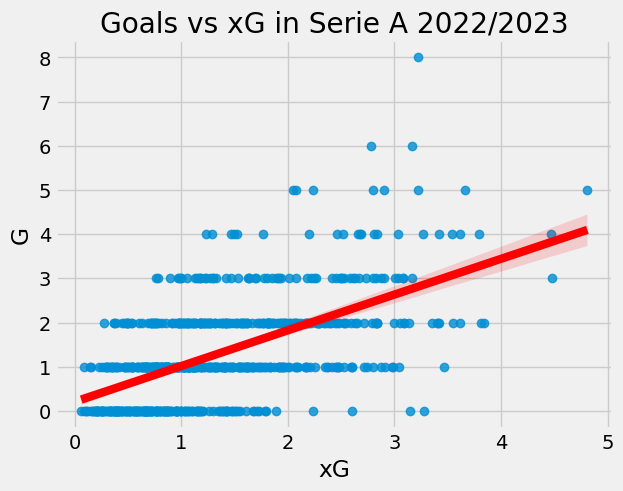

In [84]:
# Plot style
plt.style.use('fivethirtyeight')

# Plotting them

sns.regplot(x = 'xG', y = 'G', data = merged_list, line_kws=dict(color="r")).set(title='Goals vs xG in Serie A 2022/2023')

[Text(0.5, 1.0, 'Goals vs xG in Serie A 2022/2023\nHome Matches')]

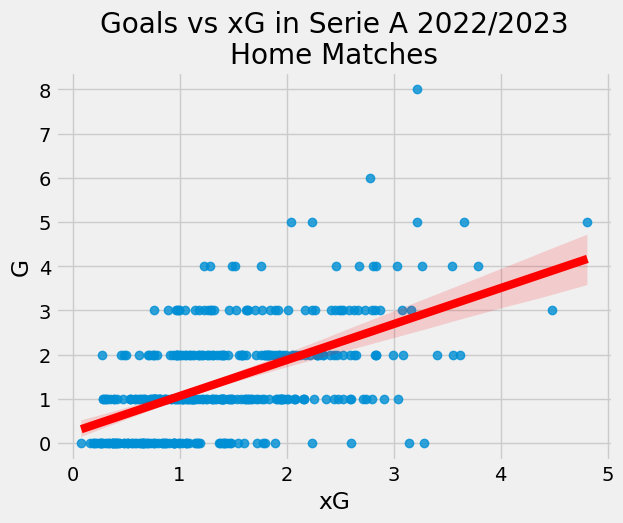

In [35]:
# Plot style
plt.style.use('fivethirtyeight')

# Plotting them

sns.regplot(x = 'xG', y = 'G', data = merged_list_h, line_kws=dict(color="r"))\
    .set(title='Goals vs xG in Serie A 2022/2023\nHome Matches')

[Text(0.5, 1.0, 'Goals vs xG in Serie A 2022/2023\nAway Matches')]

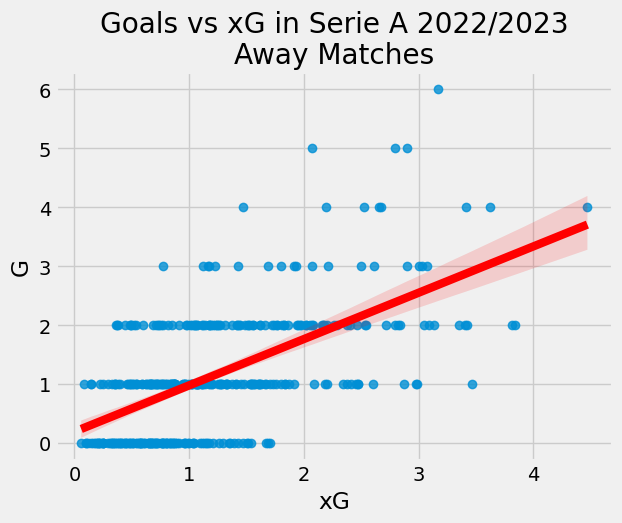

In [36]:
# Plot style
plt.style.use('fivethirtyeight')

# Plotting them

sns.regplot(x = 'xG', y = 'G', data = merged_list_a, line_kws=dict(color="r"))\
    .set(title='Goals vs xG in Serie A 2022/2023\nAway Matches')

# Doing the same on a club level

In [85]:
# Creating the dataframe
df =  pd.DataFrame(data)

# Checking
df.head()

,94,95,96,97,98,99,102,104,105,106,107,108,110,111,113,243,260,264,271,272
id,94,95,96,97,98,99,102,104,105,106,107,108,110,111,113,243,260,264,271,272
title,Verona,Roma,Lazio,Bologna,Juventus,Udinese,Sampdoria,Sassuolo,Napoli,Inter,Atalanta,Empoli,Fiorentina,AC Milan,Torino,Lecce,Spezia,Salernitana,Monza,Cremonese
history,"[{'h_a': 'h', 'xG': 1.13087, 'xGA': 2.79803, '...","[{'h_a': 'a', 'xG': 2.98256, 'xGA': 0.505094, ...","[{'h_a': 'h', 'xG': 0.709672, 'xGA': 1.59632, ...","[{'h_a': 'a', 'xG': 1.59632, 'xGA': 0.709672, ...","[{'h_a': 'h', 'xG': 2.24204, 'xGA': 0.878583, ...","[{'h_a': 'a', 'xG': 0.439661, 'xGA': 2.68095, ...","[{'h_a': 'h', 'xG': 0.617683, 'xGA': 2.28675, ...","[{'h_a': 'a', 'xG': 0.878583, 'xGA': 2.24204, ...","[{'h_a': 'a', 'xG': 2.79803, 'xGA': 1.13087, '...","[{'h_a': 'a', 'xG': 2.52817, 'xGA': 0.752988, ...","[{'h_a': 'a', 'xG': 2.28675, 'xGA': 0.617683, ...","[{'h_a': 'a', 'xG': 0.987781, 'xGA': 0.861875,...","[{'h_a': 'h', 'xG': 2.01254, 'xGA': 1.76638, '...","[{'h_a': 'h', 'xG': 2.68095, 'xGA': 0.439661, ...","[{'h_a': 'a', 'xG': 3.13646, 'xGA': 1.0301, 'n...","[{'h_a': 'h', 'xG': 0.752988, 'xGA': 2.52817, ...","[{'h_a': 'h', 'xG': 0.861875, 'xGA': 0.987781,...","[{'h_a': 'h', 'xG': 0.505094, 'xGA': 2.98256, ...","[{'h_a': 'h', 'xG': 1.0301, 'xGA': 3.13646, 'n...","[{'h_a': 'a', 'xG': 1.76638, 'xGA': 2.01254, '..."


In [86]:
# We may filter a specific club by its id
# Creating the club's  DataFrame
df_juventus =  pd.DataFrame(data['98']['history'])

# Selecting few columns 
df_juventus = df_juventus[['h_a','xG','scored']]

# Creating a new column wth a matchday number
df_juventus['Match'] = np.arange(1,39)

# Creating a new column with Goals and xG difference
df_juventus['G_xG_Diff'] = df_juventus['scored'] - df_juventus['xG']

In [87]:
df_juventus.head()

,h_a,xG,scored,Match,G_xG_Diff
0,h,2.242040,3,1,0.757960
1,a,0.807606,0,2,-0.807606
2,h,0.633345,1,3,0.366655
3,h,1.765030,2,4,0.234970
4,a,1.075220,1,5,-0.075220


# Checking basic stats

In [88]:
print('Average difference:')
sum(df_juventus['G_xG_Diff'])/len(df_juventus['G_xG_Diff'])

Average difference:


-0.0984723947368421

Positive difference means a team scores more goals than it is supposed to score besed on xG metric. It may be interpreted as team realizing its chances for more than 100%. And the other way around.

In [89]:
# Creating two separate dataframes for home and away matches

df_juventus_h = df_juventus[df_juventus['h_a'] == 'h']
df_juventus_a = df_juventus[df_juventus['h_a'] == 'a']
df_juventus_h.head()

,h_a,xG,scored,Match,G_xG_Diff
0,h,2.242040,3,1,0.757960
2,h,0.633345,1,3,0.366655
3,h,1.765030,2,4,0.234970
5,h,1.839290,2,6,0.160710
7,h,2.511620,3,8,0.488380


In [90]:
# Checking averages for home games

print('Avg xG:    ' + str(sum(df_juventus_h['xG'])/len(df_juventus_h['xG'])))
print('Avg goals: ' + str(sum(df_juventus_h['scored'])/len(df_juventus_h['scored'])))

Avg xG:    1.7777542631578946
Avg goals: 2.0


Juventus scored more goals than it supposed based on xG metric in home matches.

How can we use this? Theoretically, if xG in a home match is above a current number of goals and there is time left to play, we may expect Juventus to score.

As we'll see in a visualization a bit later, only in 5 home matches out of 18 Juventus scored less goals than their xG value.

To be more precise, we would need to analyze how often Juventus scored in home matches when their xG value was less than number of goals.

In [91]:
# Checking averages for away games

print('Avg xG:    ' + str(sum(df_juventus_a['xG'])/len(df_juventus_a['xG'])))
print('Avg goals: ' + str(sum(df_juventus_a['scored'])/len(df_juventus_a['scored'])))

Avg xG:    1.3665589473684214
Avg goals: 0.9473684210526315


In [97]:
print('Average difference in home matches:')
sum(df_juventus_h['G_xG_Diff'])/len(df_juventus_h['G_xG_Diff'])

Average difference in home matches:


0.22224573684210522

In [68]:
print('Average difference in away matches:')
sum(df_juventus_a['G_xG_Diff'])/len(df_juventus_a['G_xG_Diff'])

Average difference in away matches:


-0.41919052631578946

In [94]:
# Checking correlation between them for home matches

corr, _ = stats.pearsonr(df_juventus_h['xG'], df_juventus_h['scored'])
print('Corelation between xG & Goals in Home Matches:')
corr

Corelation between xG & Goals in Home Matches:


0.7069251299769852

In [70]:
# Checking correlation between them for away matches

corr, _ = stats.pearsonr(df_juventus_a['xG'], df_juventus_a['scored'])
print('Corelation between xG & Goals in Away Matches:')
corr

Corelation between xG & Goals in Away Matches:


0.5767500886864276

# Visualizing

[Text(0.5, 1.0, 'Goals vs xG in Home Matches')]

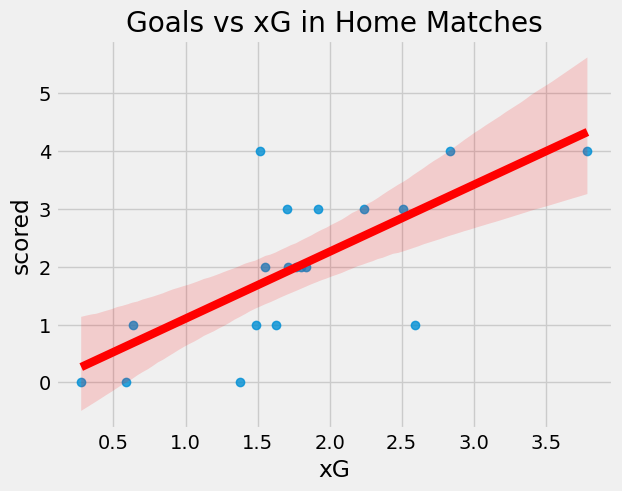

In [53]:
sns.regplot(x = "xG", y = 'scored', data = df_juventus_h, line_kws=dict(color="r")).set(title='Goals vs xG in Home Matches')

[Text(0.5, 1.0, 'Goals vs xG in Away Matches')]

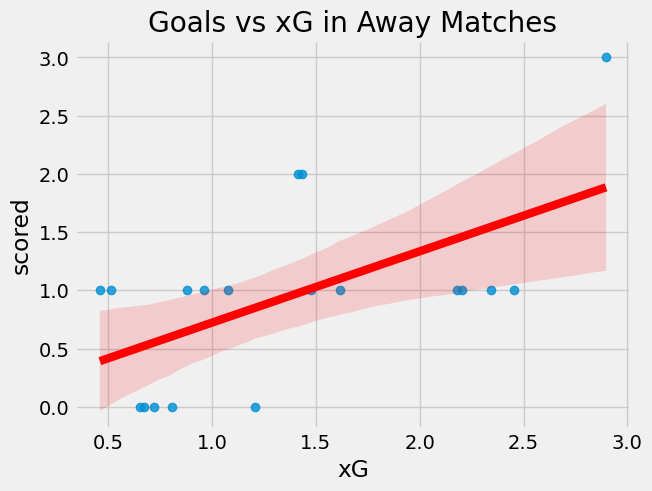

In [54]:
sns.regplot(x = "xG", y = 'scored', data = df_juventus_a, line_kws=dict(color="r")).set(title='Goals vs xG in Away Matches')

Text(0.5, 0.98, 'Juventus 2022/2023 Season\n')

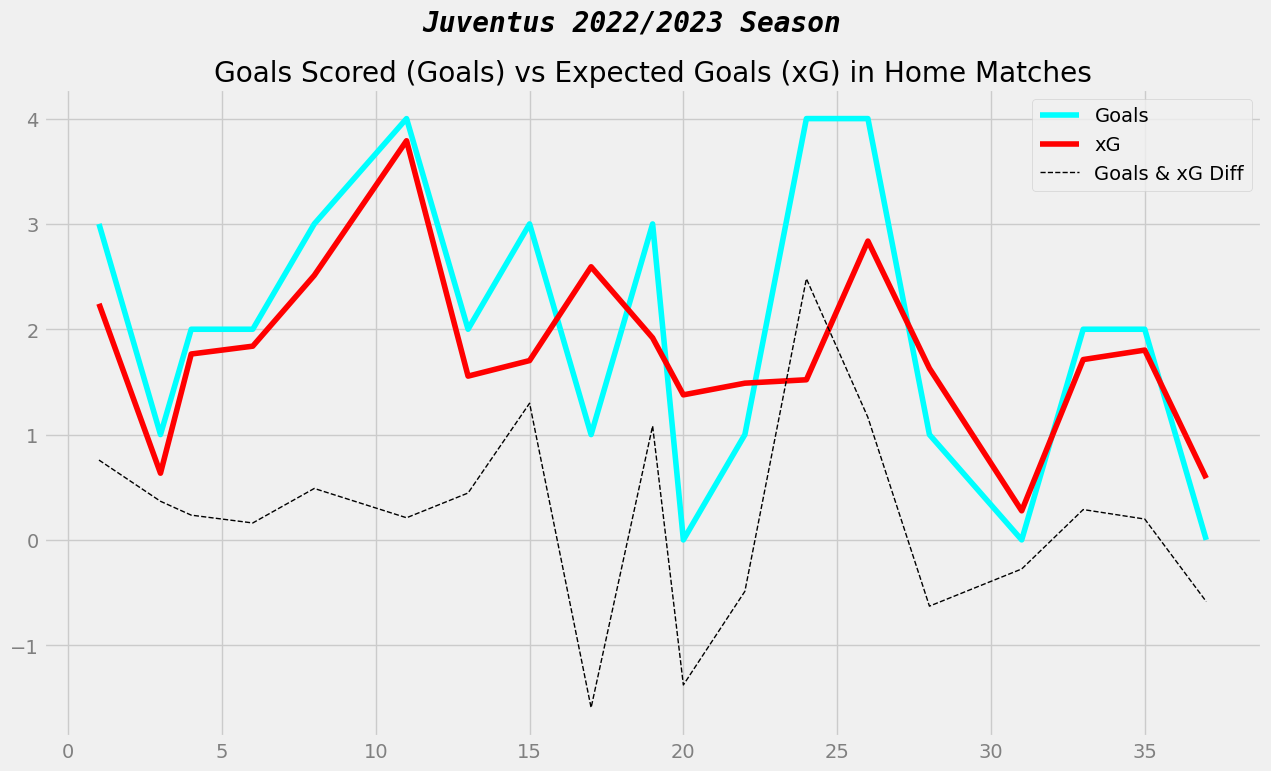

In [51]:
# Plotting style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (14,8))

# Plotting Goals and xG
ax.plot(df_juventus_h.Match,df_juventus_h.scored,label='Goals',color='cyan')
ax.plot(df_juventus_h.Match,df_juventus_h.xG,color='red',label='xG')

# Plotting G and xG Diff
ax.plot(df_juventus_h.Match,df_juventus_h.G_xG_Diff,label='Goals & xG Diff',color='black',linestyle='dashed',linewidth=1,alpha=1)

# Style for ticks
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.legend()

# Title
plt.title('Goals Scored (Goals) vs Expected Goals (xG) in Home Matches')
plt.suptitle('Juventus 2022/2023 Season\n', 
         fontsize=20,
        #loc='center',
        fontweight='bold',
        style='italic',
        family='monospace')

Only in 5 home matches out of 18, Juventus scored less than their xG value

Text(0.5, 0.98, 'Juventus 2022/2023 Season\n')

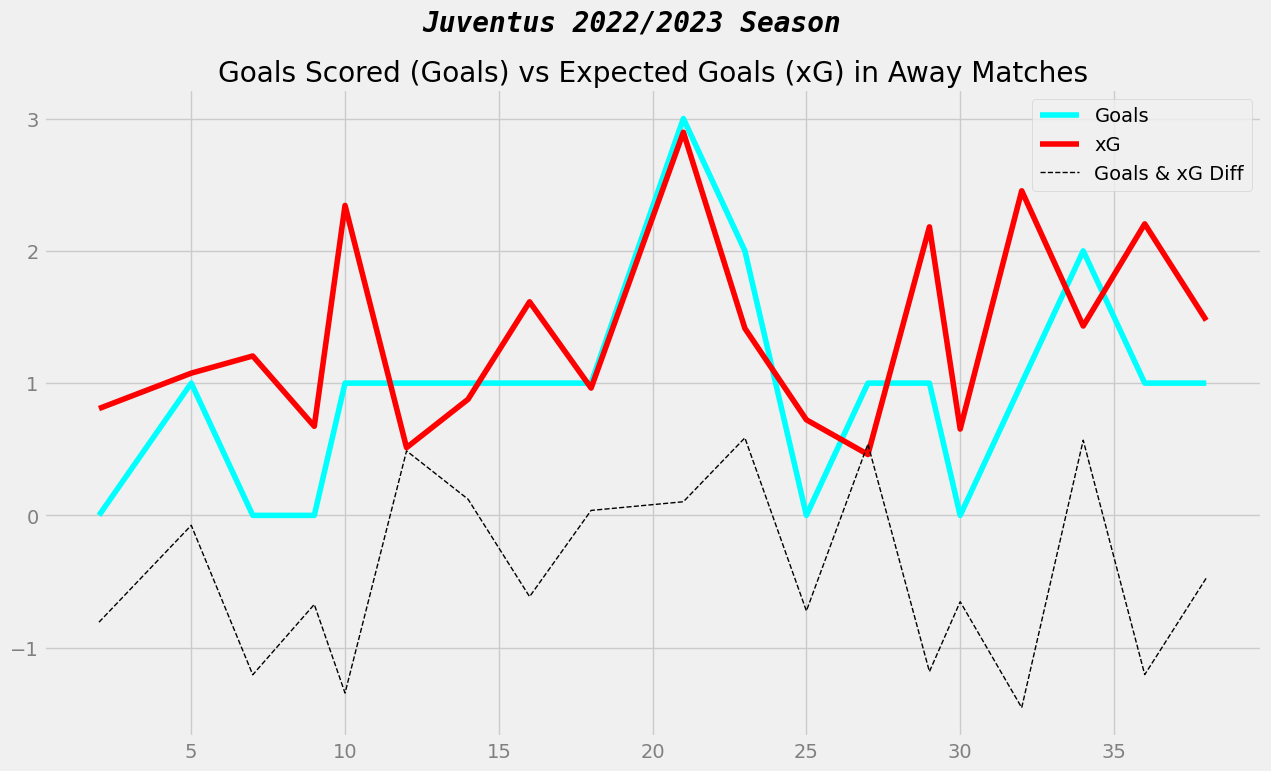

In [52]:
# Plotting style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (14,8))

# Plotting Goals and xG
ax.plot(df_juventus_a.Match,df_juventus_a.scored,label='Goals',color='cyan')
ax.plot(df_juventus_a.Match,df_juventus_a.xG,color='red',label='xG')

# Plotting G and xG Diff
ax.plot(df_juventus_a.Match,df_juventus_a.G_xG_Diff,label='Goals & xG Diff',color='black',linestyle='dashed',linewidth=1,alpha=1)

# Style for ticks
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.legend()

# Title
plt.title('Goals Scored (Goals) vs Expected Goals (xG) in Away Matches')
plt.suptitle('Juventus 2022/2023 Season\n', 
         fontsize=20,
        #loc='center',
        fontweight='bold',
        style='italic',
        family='monospace')

# Adding Moving Averages

In [107]:
# Creating the rolling/moving average columns
df_juventus['xgSMA'] = df_juventus['xG'].rolling(window=5).mean()
df_juventus['xgSMA_9'] = df_juventus['xG'].rolling(window=9).mean()
df_juventus['xgSMA_7'] = df_juventus['xG'].rolling(window=7).mean()
df_juventus['xgSMA_3'] = df_juventus['xG'].rolling(window=3).mean()
df_juventus['GSMA'] = df_juventus['scored'].rolling(window=5).mean()

In [104]:
df_juventus.head(10)

,h_a,xG,scored,Match,G_xG_Diff,xgSMA,GSMA,xgSMA_3,xgSMA_7
0,h,2.242040,3,1,0.757960,NaN,NaN,NaN,NaN
1,a,0.807606,0,2,-0.807606,NaN,NaN,NaN,NaN
2,h,0.633345,1,3,0.366655,NaN,NaN,1.227664,NaN
3,h,1.765030,2,4,0.234970,NaN,NaN,1.068660,NaN
4,a,1.075220,1,5,-0.075220,1.304648,1.4,1.157865,NaN
5,h,1.839290,2,6,0.160710,1.224098,1.2,1.559847,NaN
6,a,1.205180,0,7,-1.205180,1.303613,1.2,1.373230,1.366816
7,h,2.511620,3,8,0.488380,1.679268,1.6,1.852030,1.405327
8,a,0.673421,0,9,-0.673421,1.460946,1.2,1.463407,1.386158
9,a,2.343350,1,10,-1.343350,1.714572,1.2,1.842797,1.630444


Text(0.5, 0.98, 'Juventus 2022/2023 Season')

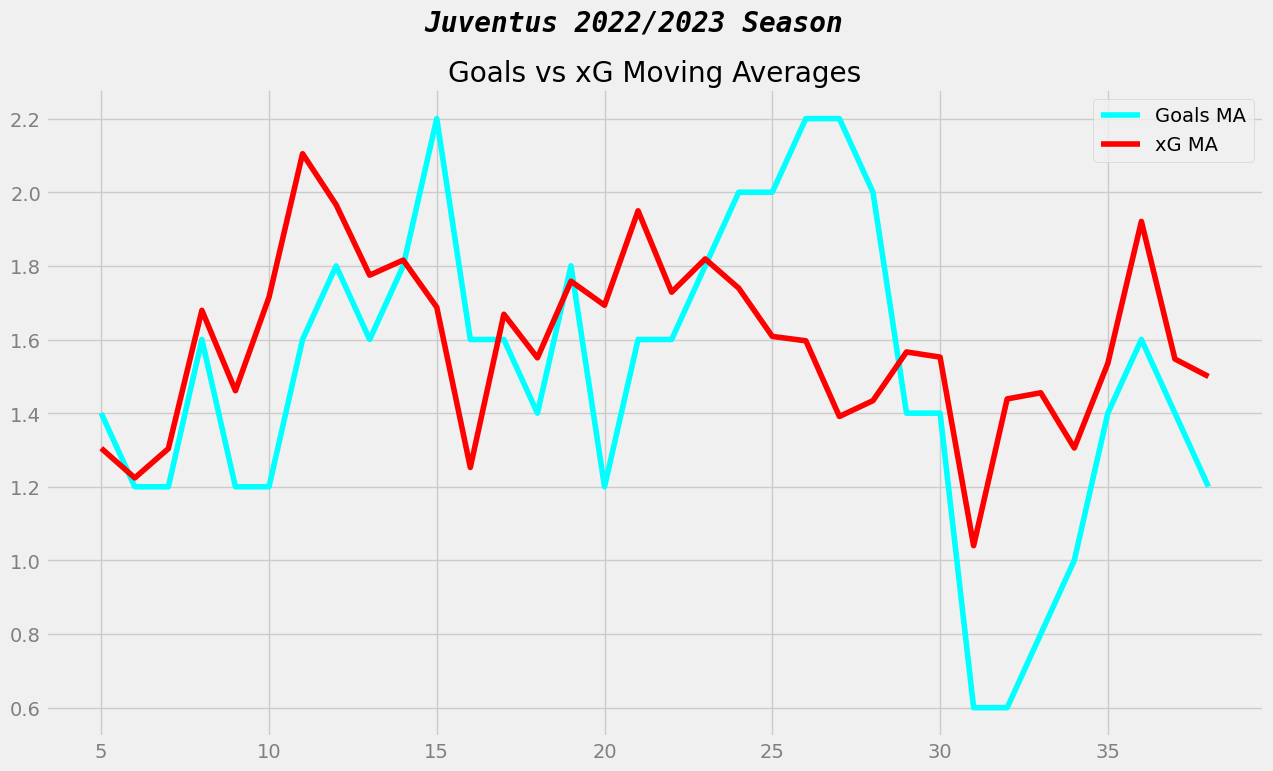

In [61]:
# plot style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (14,8))
# plotting xG and xGA
ax.plot(df_juventus.Match,df_juventus.GSMA,label='Goals MA',color='cyan')
ax.plot(df_juventus.Match,df_juventus.xgSMA,label='xG MA', color='red')
#plotting G and GA
#ax.plot(df_juventus.Match,df_juventus.xG,label='xG',color='cyan',linestyle='dashed',linewidth=1,alpha=0.8)
#ax.plot(df_juventus.Match,df_juventus.xGA,label='xGA',color='red',linestyle='dashed',linewidth=1,alpha=0.4)
# style 
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.legend()

# Title
plt.title('Goals vs xG Moving Averages')
plt.suptitle('Juventus 2022/2023 Season', 
         fontsize=20,
        #loc='center',
        fontweight='bold',
        style='italic',
        family='monospace')

We see that xG moving average may be a relatively good predictor of average goals with a window of 5. However, it less likely to be for home and away separately, as there are only 18 matches and it less reliable.

In [63]:
df_juventus_h = df_juventus[df_juventus['h_a'] == 'h']
df_juventus_a = df_juventus[df_juventus['h_a'] == 'a']

Text(0.5, 0.98, 'Juventus 2022/2023 Season (Home)')

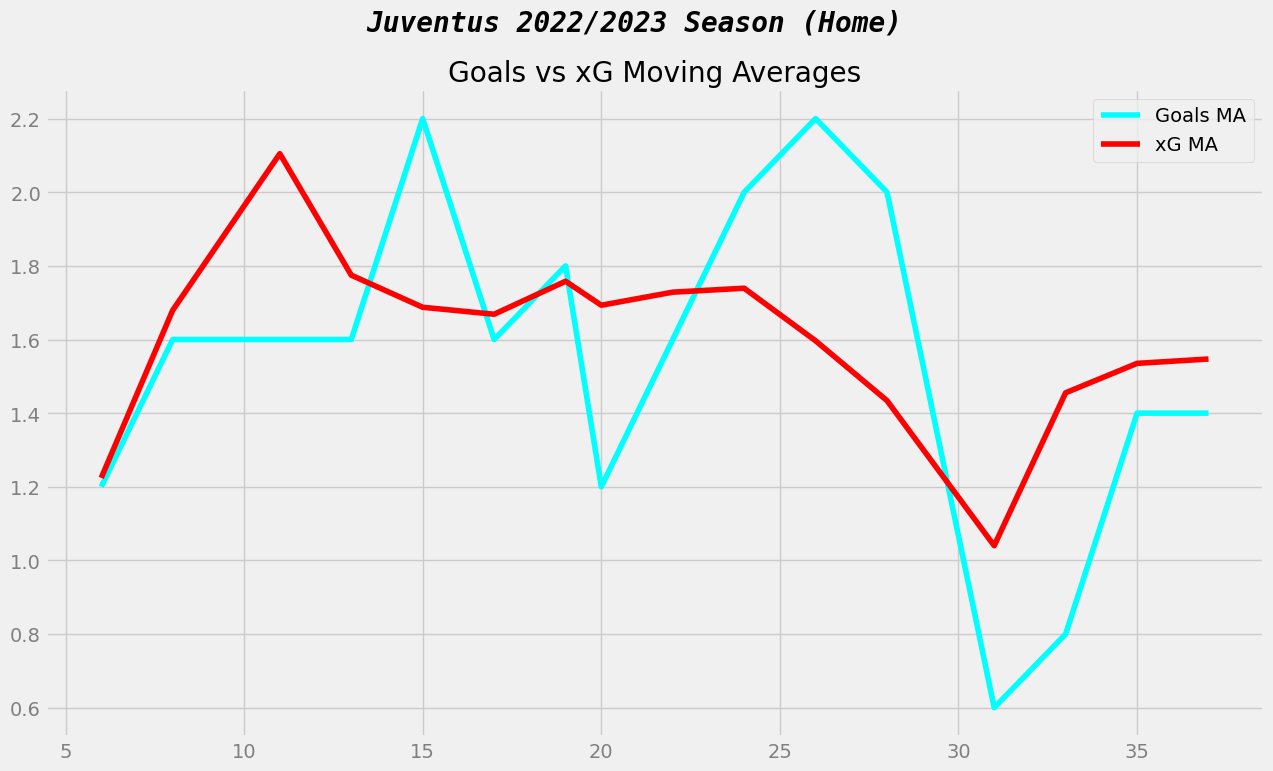

In [64]:
# plot style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (14,8))
# plotting xG and xGA
ax.plot(df_juventus_h.Match,df_juventus_h.GSMA,label='Goals MA',color='cyan')
ax.plot(df_juventus_h.Match,df_juventus_h.xgSMA,label='xG MA', color='red')
#plotting G and GA
#ax.plot(df_juventus.Match,df_juventus.xG,label='xG',color='cyan',linestyle='dashed',linewidth=1,alpha=0.8)
#ax.plot(df_juventus.Match,df_juventus.xGA,label='xGA',color='red',linestyle='dashed',linewidth=1,alpha=0.4)
# style 
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.legend()

# Title
plt.title('Goals vs xG Moving Averages')
plt.suptitle('Juventus 2022/2023 Season (Home)', 
         fontsize=20,
        #loc='center',
        fontweight='bold',
        style='italic',
        family='monospace')

Text(0.5, 0.98, 'Juventus 2022/2023 Season (Away)')

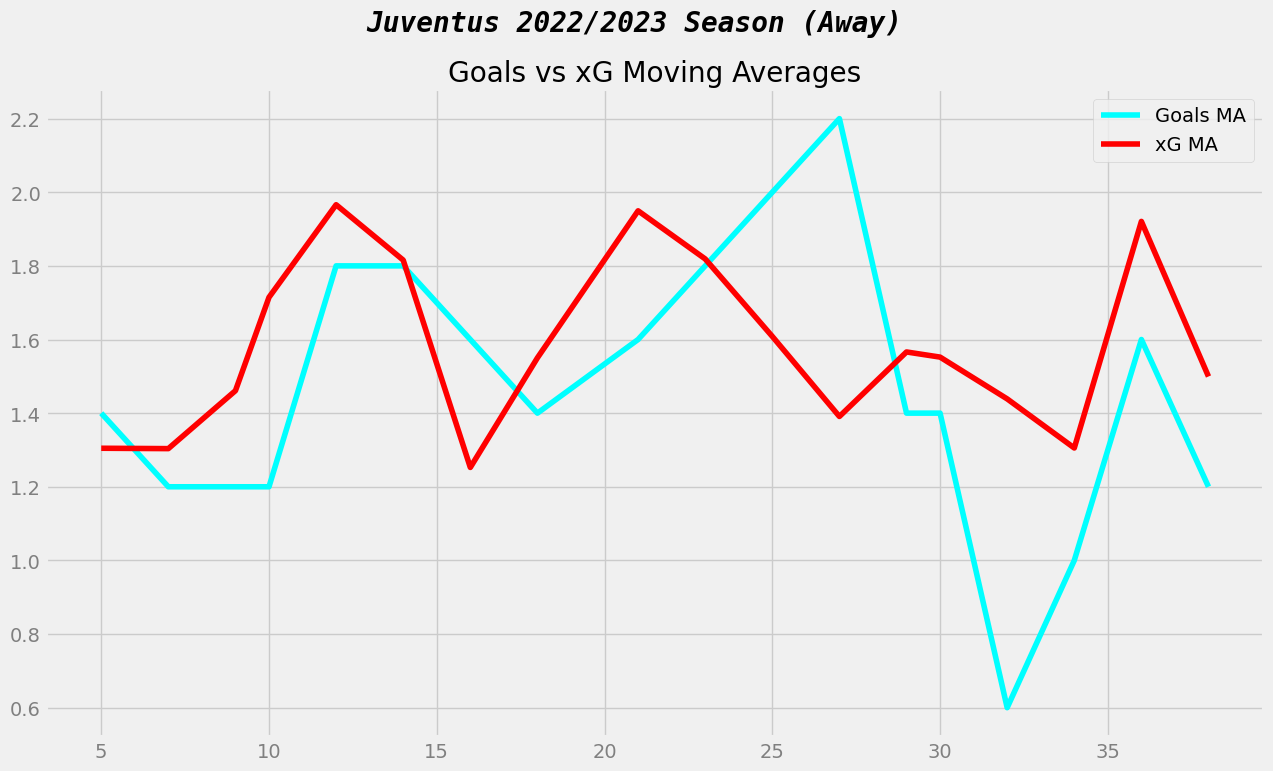

In [65]:
# plot style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (14,8))
# plotting xG and xGA
ax.plot(df_juventus_a.Match,df_juventus_a.GSMA,label='Goals MA',color='cyan')
ax.plot(df_juventus_a.Match,df_juventus_a.xgSMA,label='xG MA', color='red')
#plotting G and GA
#ax.plot(df_juventus.Match,df_juventus.xG,label='xG',color='cyan',linestyle='dashed',linewidth=1,alpha=0.8)
#ax.plot(df_juventus.Match,df_juventus.xGA,label='xGA',color='red',linestyle='dashed',linewidth=1,alpha=0.4)
# style 
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.legend()

# Title
plt.title('Goals vs xG Moving Averages')
plt.suptitle('Juventus 2022/2023 Season (Away)', 
         fontsize=20,
        #loc='center',
        fontweight='bold',
        style='italic',
        family='monospace')

Text(0.5, 0.98, 'Juventus 2022/2023 Season')

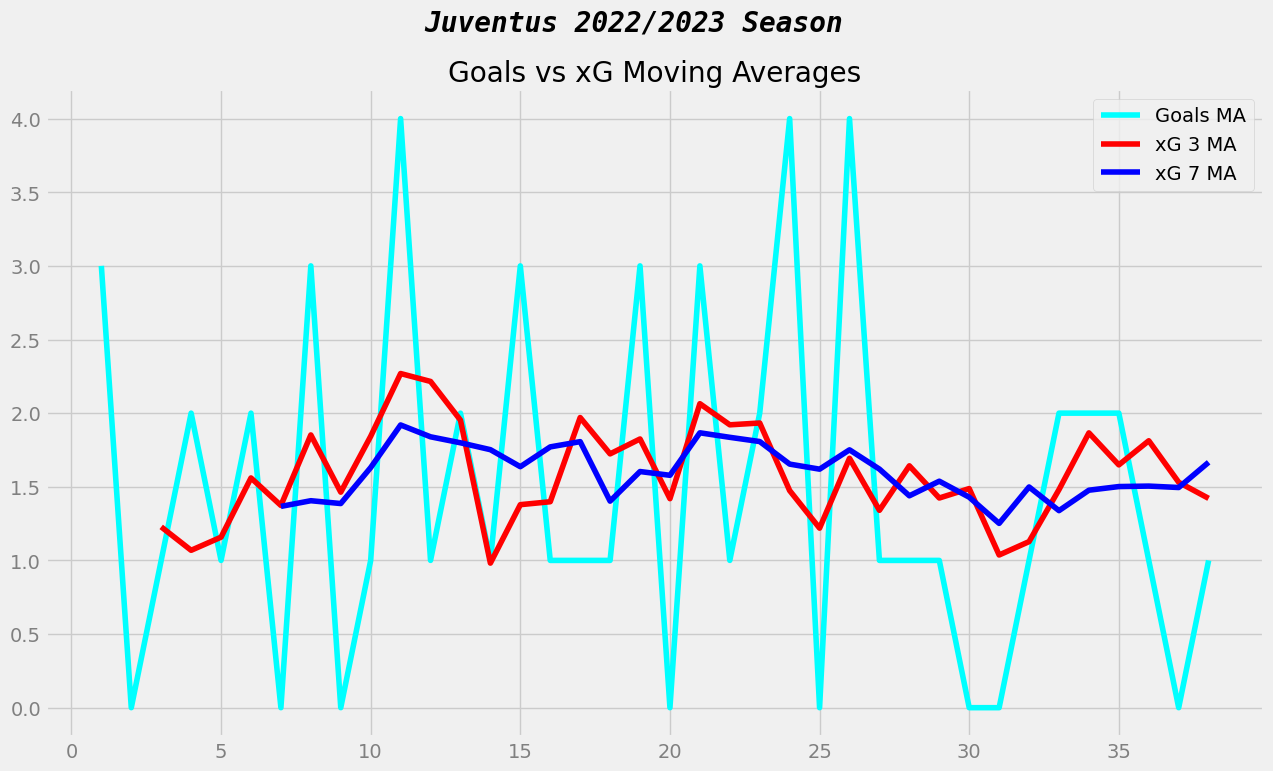

In [109]:
# plot style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (14,8))
# plotting xG and xGA
ax.plot(df_juventus.Match,df_juventus.scored,label='Goals MA',color='cyan')
ax.plot(df_juventus.Match,df_juventus.xgSMA_3,label='xG 3 MA', color='red')
ax.plot(df_juventus.Match,df_juventus.xgSMA_7,label='xG 7 MA', color='blue')
#ax.plot(df_juventus.Match,df_juventus.xgSMA_9,label='xG 9 MA', color='yellow')
#plotting G and GA
#ax.plot(df_juventus.Match,df_juventus.xG,label='xG',color='cyan',linestyle='dashed',linewidth=1,alpha=0.8)
#ax.plot(df_juventus.Match,df_juventus.xGA,label='xGA',color='red',linestyle='dashed',linewidth=1,alpha=0.4)
# style 
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.legend()

# Title
plt.title('Goals vs xG Moving Averages')
plt.suptitle('Juventus 2022/2023 Season', 
         fontsize=20,
        #loc='center',
        fontweight='bold',
        style='italic',
        family='monospace')